# ANALYSIS OF AN IMAGE SEQUENCE AFTER DATA GENERATION USING THE CALCIUM CHARACTERIZATION PIPELINE

### Initialization

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
import pandas as pd

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram, 
    plot_pie_chart,
    visualize_image,
    plot_bar,
    plot_histogram_by_group,
    plot_scatter_size_coded,
    plot_points_mean_std,
    plot_early_peakers_heatmap
    )
from calcium_activity_characterization.io.csv_loader import load_and_merge_datasets
from calcium_activity_characterization.analysis.statistics import analyze_peak_intervals, build_neighbor_pair_stats

sns.set(style="whitegrid")

figure_path=Path("C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures")

In [2]:
# Define paths to control datasets
control_paths = {
    "20250326_IS1": "D:/Mateo/20250701/Output/IS2"
}

In [3]:
# Load and merge datasets
peaks = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/peaks.csv")
cells = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/cells.csv")
events = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/events.csv")
communications = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/communications.csv")
cellmotion = load_and_merge_datasets(control_paths=control_paths, file_name="cell-motion/metrics_cellmotion.csv")

## POPULATION

### Binary & Heatmap Raster Plot

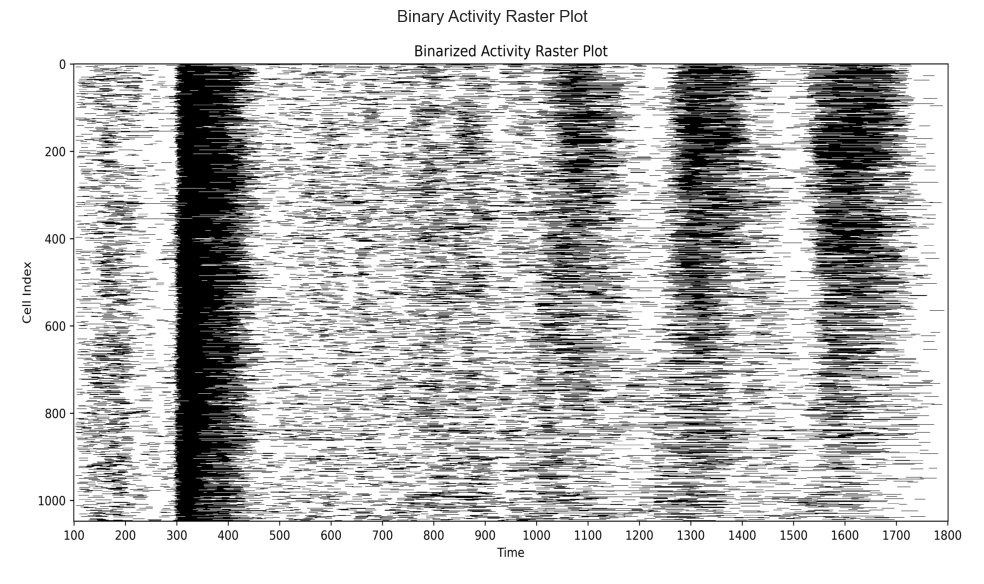

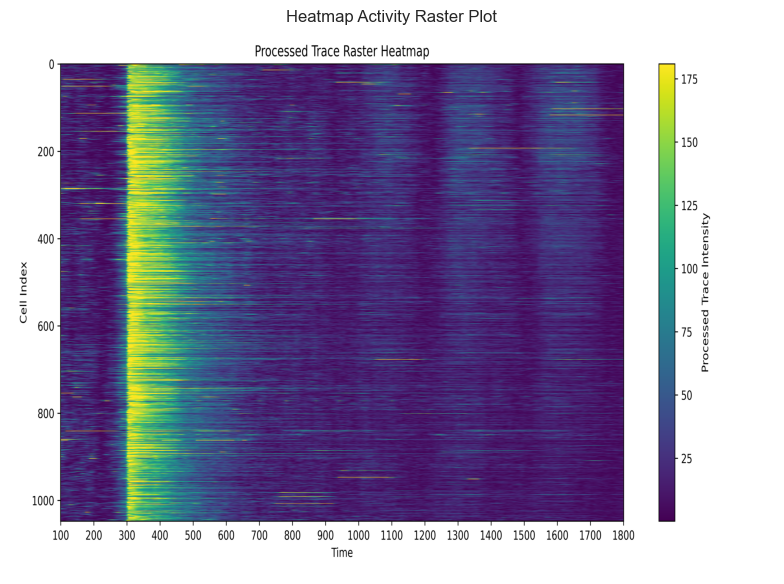

In [4]:
visualize_image(
    image_source=control_paths,
    image_name="signal-processing/raster_plot.png",
    title="Binary Activity Raster Plot",
    figsize=(10, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="signal-processing/heatmap_raster.png",
    title="Heatmap Activity Raster Plot",
    figsize=(8, 6)
)

### Peaks population

In [5]:
print(f"Total number of peaks: {len(peaks)}")
print(f"Total number of cells: {len(cells)}")

Total number of peaks: 11008
Total number of cells: 1048


### Peaks statistics

[2025-08-26 17:08:29] [INFO] calcium: plot_histogram: removed 133 outliers out of 11008 on 'Duration (s)' (lower=-106, upper=188)


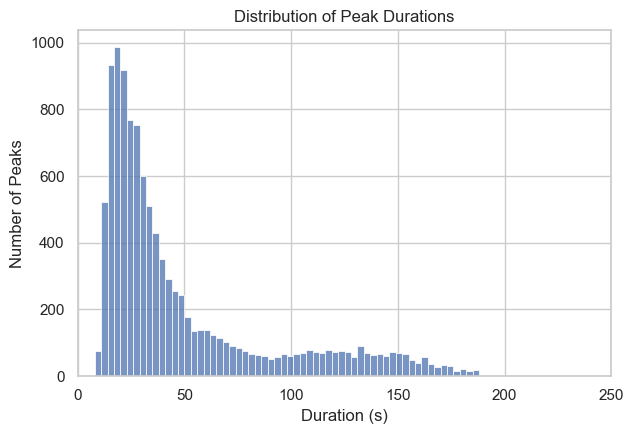

[2025-08-26 17:08:30] [INFO] calcium: plot_histogram: removed 1101 outliers out of 11008 on 'Prominence (noise std units)' (lower=-54.5, upper=118.4)


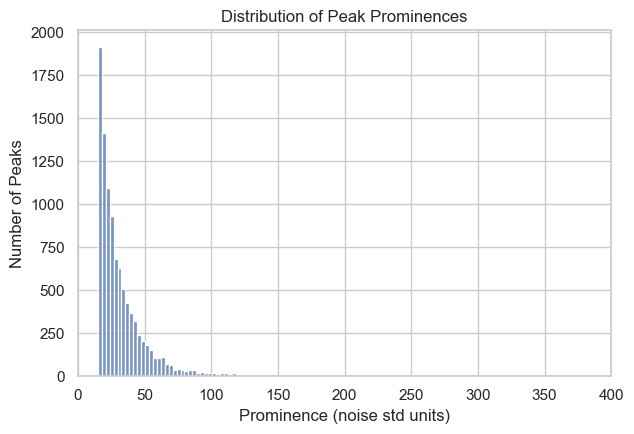

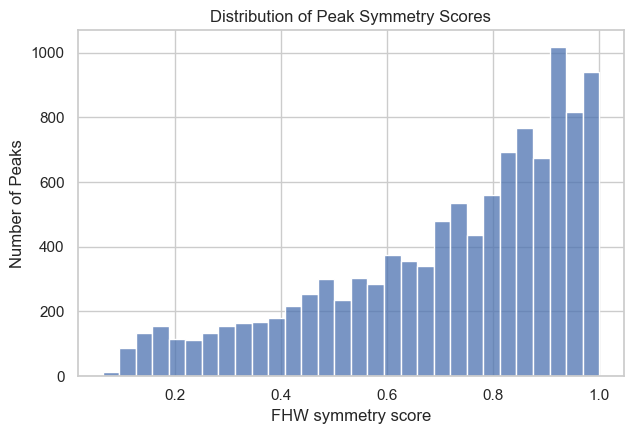

In [6]:
plot_histogram(
    df=peaks,
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks,
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks,
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Distribution of peaks per event types

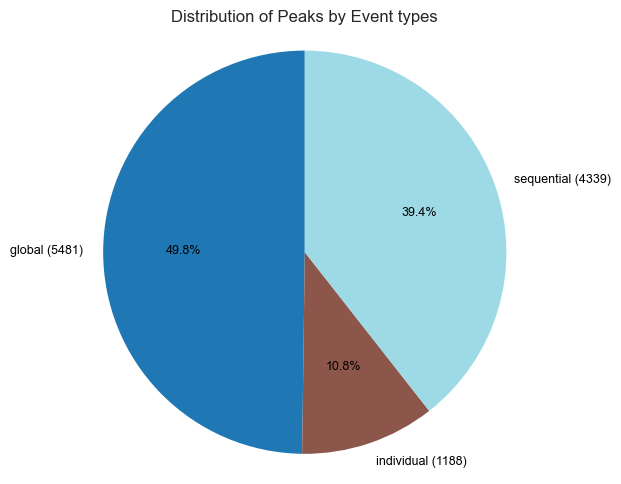

In [7]:
plot_pie_chart(
    df=peaks,
    column="In event",
    title="Distribution of Peaks by Event types",
    palette="tab20"
)

### Peaks statistics per event types

[2025-08-26 17:08:30] [INFO] calcium: plot_histogram_by_group: removed 133 outliers out of 11008 on 'Duration (s)' (lower=-106, upper=188)


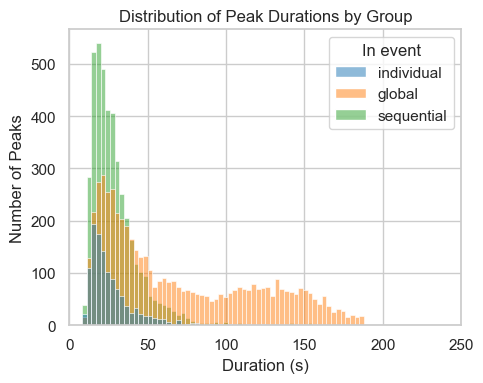

[2025-08-26 17:08:30] [INFO] calcium: plot_histogram_by_group: removed 1101 outliers out of 11008 on 'Prominence (noise std units)' (lower=-54.5, upper=118.4)


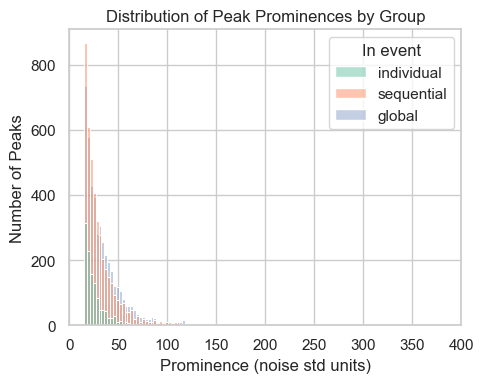

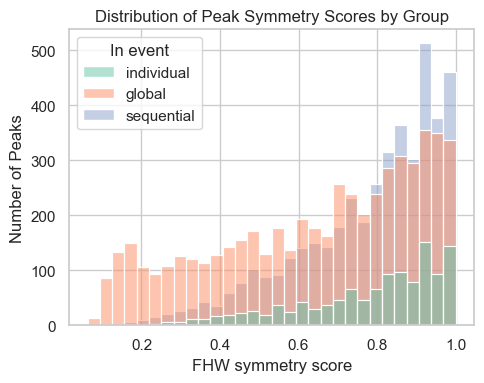

In [8]:
peaks["In event"] = peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=peaks,
    value_column="Duration (s)",
    group_column="In event",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250),
)
plot_histogram_by_group(
    df=peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400),
)
plot_histogram_by_group(
    df=peaks,
    value_column="FHW symmetry score",
    group_column="In event",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2",
)

## GLOBAL EVENTS

### Peak statistics in global events

[2025-08-26 17:08:31] [INFO] calcium: plot_histogram: removed 0 outliers out of 5481 on 'Duration (s)' (lower=-230, upper=372)


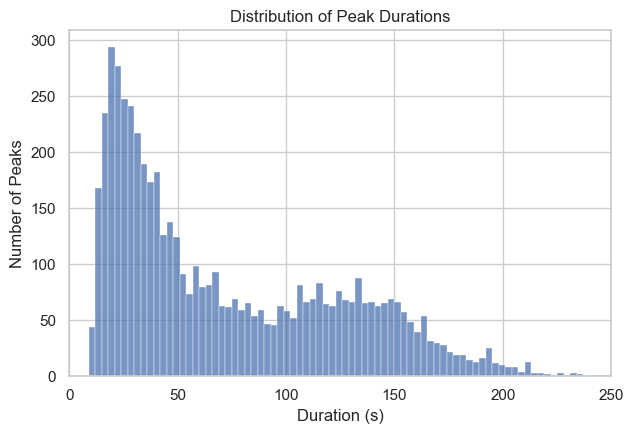

[2025-08-26 17:08:31] [INFO] calcium: plot_histogram: removed 628 outliers out of 5481 on 'Prominence (noise std units)' (lower=-105.7, upper=190.4)


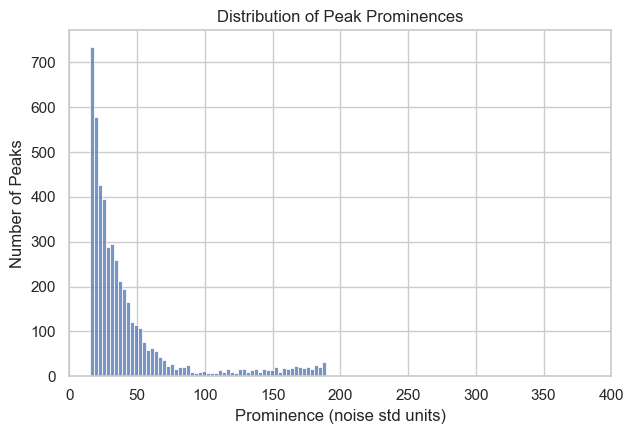

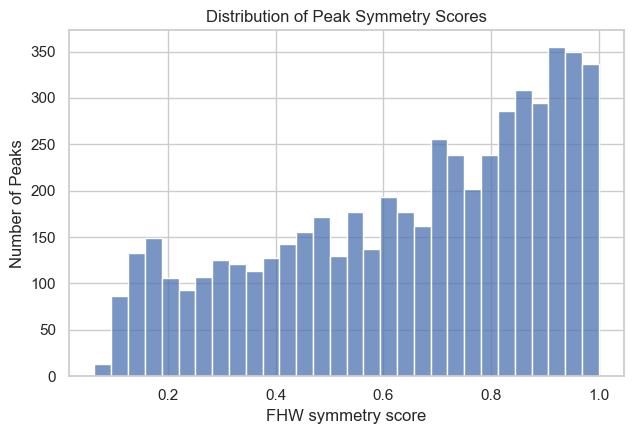

In [9]:
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Peak statistics in global event per event ID

[2025-08-26 17:08:31] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 5481 on 'Duration (s)' (lower=-230, upper=372)


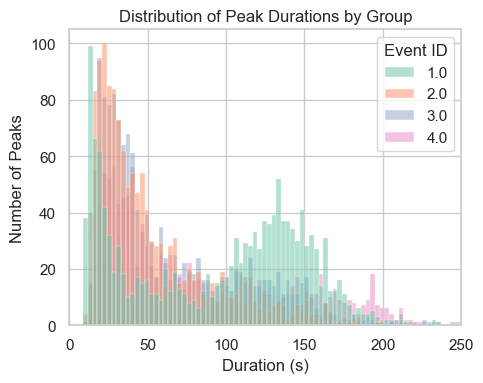

[2025-08-26 17:08:32] [INFO] calcium: plot_histogram_by_group: removed 628 outliers out of 5481 on 'Prominence (noise std units)' (lower=-105.7, upper=190.4)


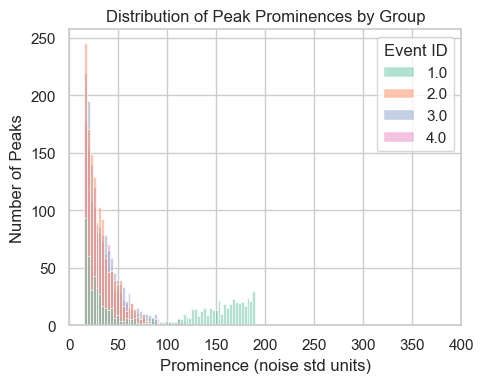

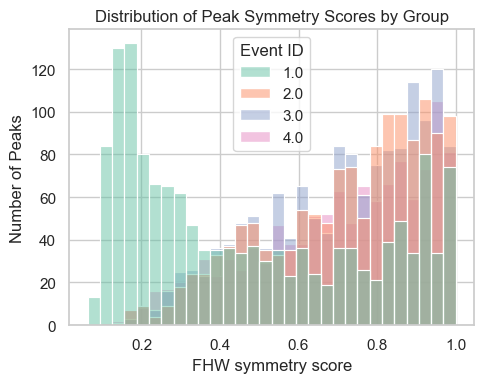

In [10]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Duration (s)",
    group_column="Event ID",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Prominence (noise std units)",
    group_column="Event ID",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="FHW symmetry score",
    group_column="Event ID",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

### Kinetics of global events

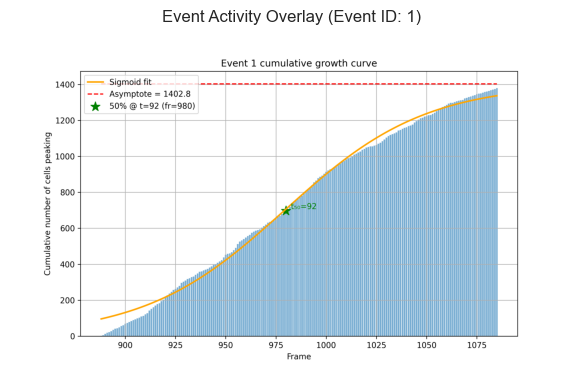

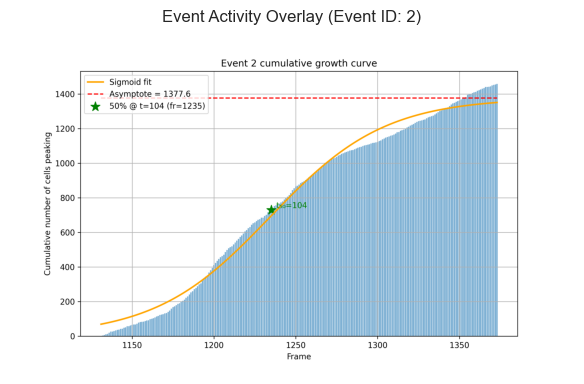

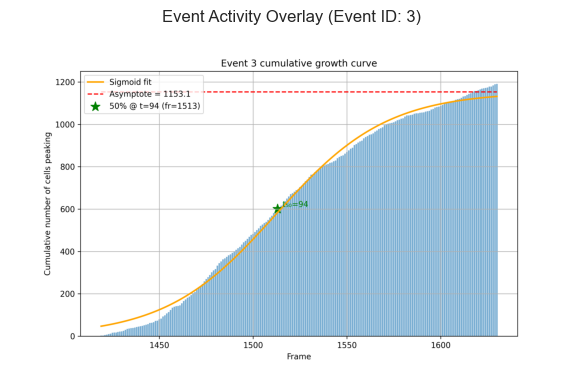

[2025-08-26 17:08:34] [ERROR] calcium: Failed to read image 'D:\Mateo\20250701\Output\IS2\events\event-growth-curve-4.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250701\\Output\\IS2\\events\\event-growth-curve-4.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = open(fp, "rb")
FileNotFoundError: [Errno 2] No such file or di

In [11]:
global_events = events[events["Event type"] == "GlobalEvent"].copy()

for event_id in global_events["Event ID"]:
    visualize_image(
        image_source=control_paths,
        image_name=f"events/event-growth-curve-{event_id}.png",
        title=f"Event Activity Overlay (Event ID: {event_id})",
        figsize=(6, 4)
    )

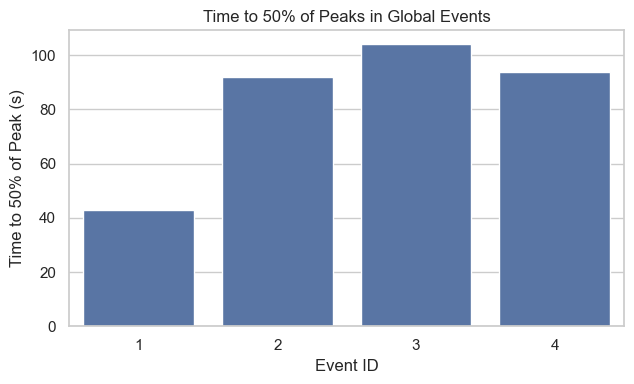

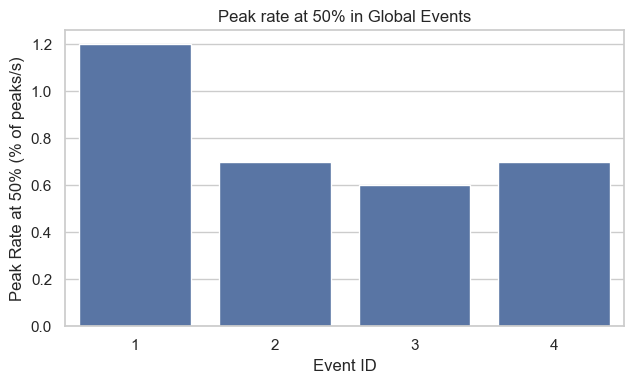

In [12]:
plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="Time to 50% (s)",
    title="Time to 50% of Peaks in Global Events",
    ylabel="Time to 50% of Peak (s)",
    xlabel="Event ID",
    rotation=0,
    palette="muted",
    hue_column=None
)
plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="Normalized peak rate at 50% (% of peaks/s)",
    title="Peak rate at 50% in Global Events",
    ylabel="Peak Rate at 50% (% of peaks/s)",
    xlabel="Event ID",
    rotation=0,
    palette="muted",
    hue_column=None
)

### Cells Occurrences in global events

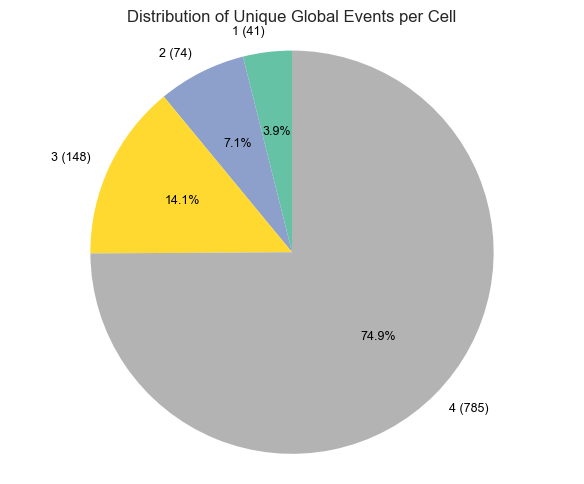

In [13]:
plot_pie_chart(
    df=cells,
    column="Occurrences in global events",
    title="Distribution of Unique Global Events per Cell",
    palette="Set2"
)

In [14]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_Occurrences_in_global_events_overlay.png",
    title="Cell Mapping with Occurrences in Global Events Overlay",
    figsize=(5, 6)
)

[2025-08-26 17:08:34] [ERROR] calcium: Failed to read image 'D:\Mateo\20250701\Output\IS2\cell-mapping\cell_Occurrences_in_global_events_overlay.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250701\\Output\\IS2\\cell-mapping\\cell_Occurrences_in_global_events_overlay.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = open(fp,

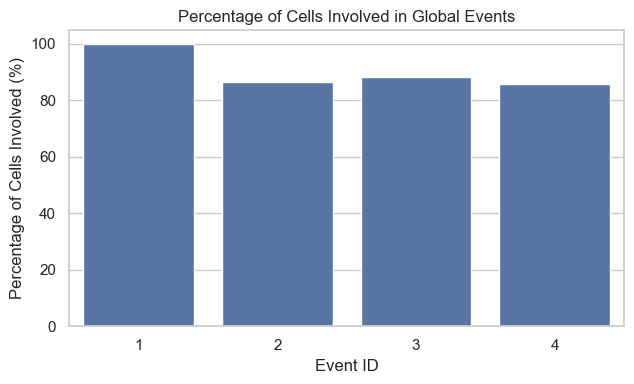

In [15]:
global_events["% of cells involved"] = 100 * global_events["Number of cells involved"] / len(cells)

plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="% of cells involved",
    title="Percentage of Cells Involved in Global Events",
    ylabel="Percentage of Cells Involved (%)",
    xlabel="Event ID",
    rotation=0
)

### Inter-event interval analysis

In [16]:
intervals, periodicity, frequency = analyze_peak_intervals(events[events["Event type"] == "GlobalEvent"]["Event peak time (s)"].tolist())

print(f"Intervals between global event peaks: {intervals}")

if periodicity is not None:
    print(f"Estimated periodicity: {periodicity:.3f}")

if periodicity is not None and periodicity > 0.8:
    print("The global events exhibit a regular periodic pattern.")
    print(f"Estimated frequency (1/mean interval): {frequency:.3f} Hz")

Intervals between global event peaks: [754.0, 233.0, 288.0]
Estimated periodicity: 0.645


### Early peakers in the events

[2025-08-26 17:08:35] [ERROR] calcium: Failed to read image 'D:\Mateo\20250701\Output\IS2\cell-mapping\global_events\global_event_1_early_peakers_overlay.png': not a PNG file
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 144, in __init__
    self._open()
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image

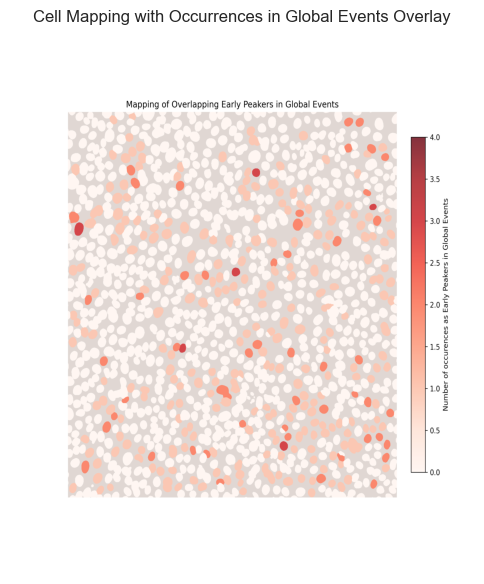

In [17]:
for event_id in global_events["Event ID"]:
    visualize_image(
        image_source=control_paths,
        image_name=f"cell-mapping/global_events/global_event_{event_id}_early_peakers_overlay.png",
        title=f"Cell Mapping with Early Peakers Overlay for event {event_id}",
        figsize=(5, 6)
    )

visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/global_events/global_event_overlap_early_peakers_overlay.png",
    title="Cell Mapping with Occurrences in Global Events Overlay",
    figsize=(5, 6)
)

[2025-08-26 17:08:36] [WARNING] calcium: 'total_events' is deprecated and ignored. Using 4 unique event IDs.
[2025-08-26 17:08:36] [INFO] calcium: Early peakers event-matrix: 312 cells x 4 events; black squares: 375


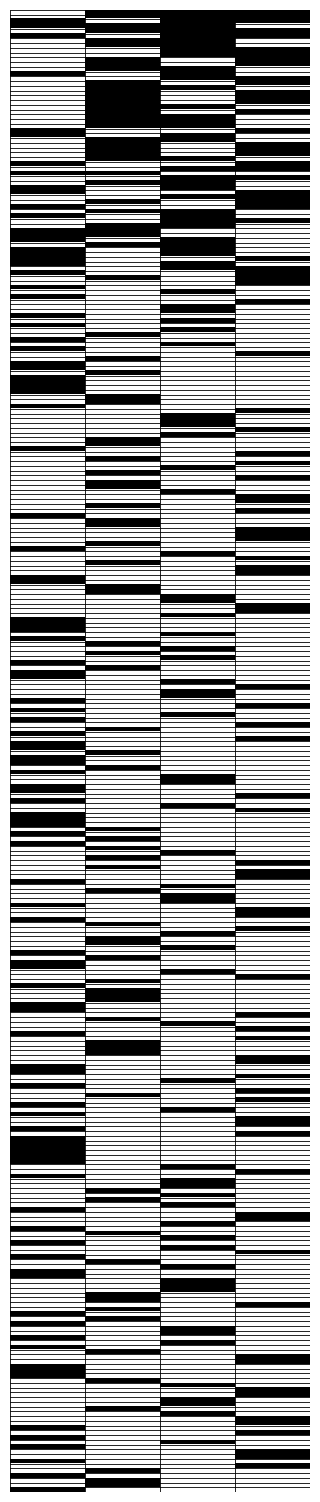

[2025-08-26 17:08:37] [INFO] calcium: Saved early peakers heatmap SVG to: early_peakers_heatmap.svg


array([[0, 1, 1, 1],
       [0, 1, 1, 1],
       [1, 0, 1, 1],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [18]:
plot_early_peakers_heatmap(
    cells=cells,
    total_events=len(global_events),
)

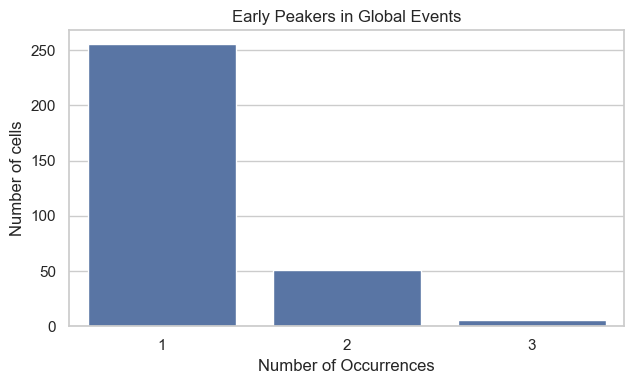

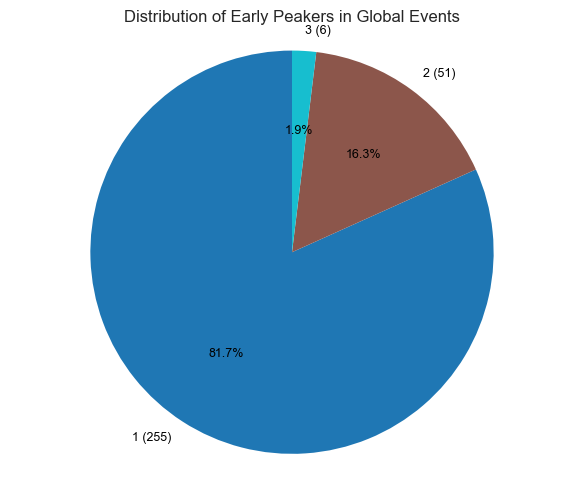

In [19]:
early_peakers_df = (
    cells[cells["Occurrences in global events as early peaker"] > 0]
      .groupby("Occurrences in global events as early peaker")
      .size()
      .reset_index(name="Number of cells")
      .rename(columns={"Occurrences in global events as early peaker": "Number of Occurrences"})
      .sort_values("Number of Occurrences")
)

plot_bar(
    df=early_peakers_df,
    axis_column="Number of Occurrences",
    value_column="Number of cells",
    title="Early Peakers in Global Events",
    xlabel="Number of Occurrences",
    ylabel="Number of cells",
    rotation=0
)

plot_pie_chart(
    df=cells[cells["Occurrences in global events as early peaker"] > 0],
    column="Occurrences in global events as early peaker",
    title="Distribution of Early Peakers in Global Events"
)

## SEQUENTIAL EVENTS

### Cells Occurrences in sequencial events

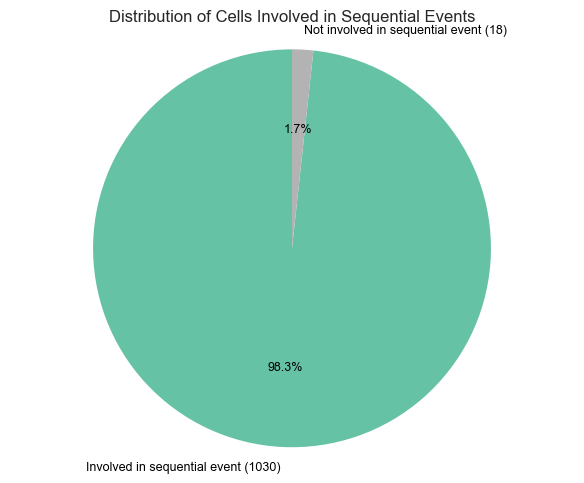

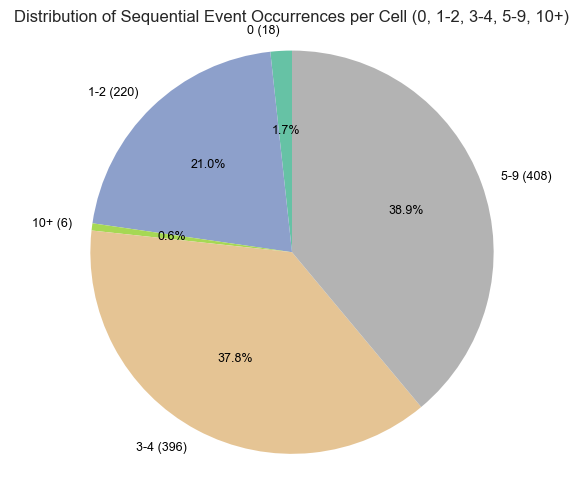

In [20]:
cells["Involved in sequential event"] = cells["Occurrences in sequential events"].apply(lambda x: "Involved in sequential event" if x > 0 else "Not involved in sequential event")

plot_pie_chart(
    df=cells,
    column="Involved in sequential event",
    title="Distribution of Cells Involved in Sequential Events",
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1 or n == 2:
        return "1-2"
    elif n == 3 or n == 4:
        return "3-4"
    elif n < 10:
        return "5-9"
    else:
        return "10+"

cells["Occurrences in sequential events category"] = cells["Occurrences in sequential events"].apply(cells_category)

plot_pie_chart(
    df=cells,
    column="Occurrences in sequential events category",
    title="Distribution of Sequential Event Occurrences per Cell (0, 1-2, 3-4, 5-9, 10+)",
    palette="Set2"
)

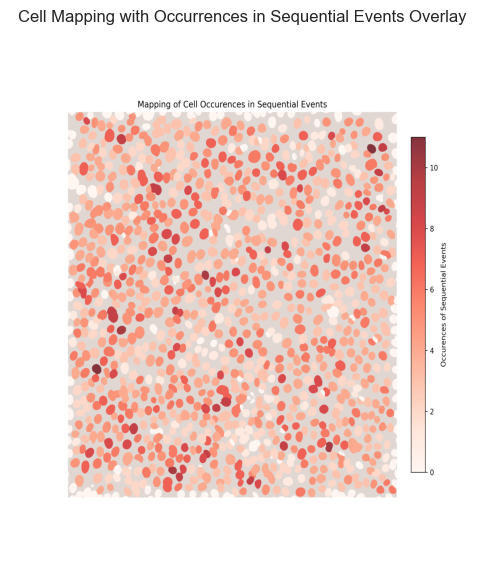

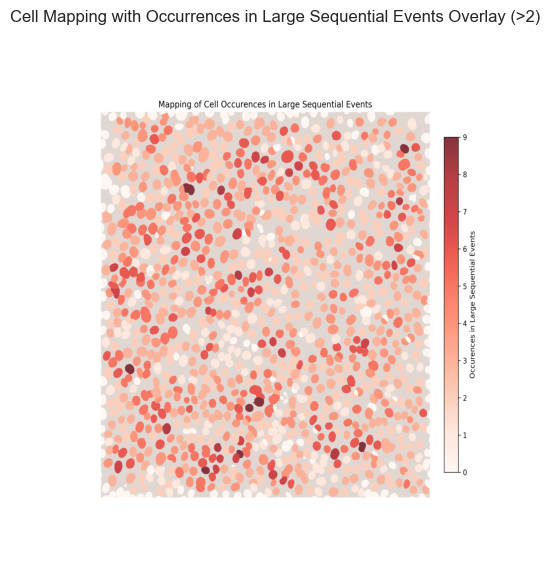

In [21]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_Occurences_in_sequential_events_overlay.png",
    title="Cell Mapping with Occurrences in Sequential Events Overlay",
    figsize=(5, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_Occurences_in_large_sequential_events_overlay.png",
    title="Cell Mapping with Occurrences in Large Sequential Events Overlay (>2)",
    figsize=(5, 6)
)

### Peaks statistics in sequential events

[2025-08-26 17:08:39] [INFO] calcium: plot_histogram: removed 74 outliers out of 4339 on 'Duration (s)' (lower=-6, upper=90)


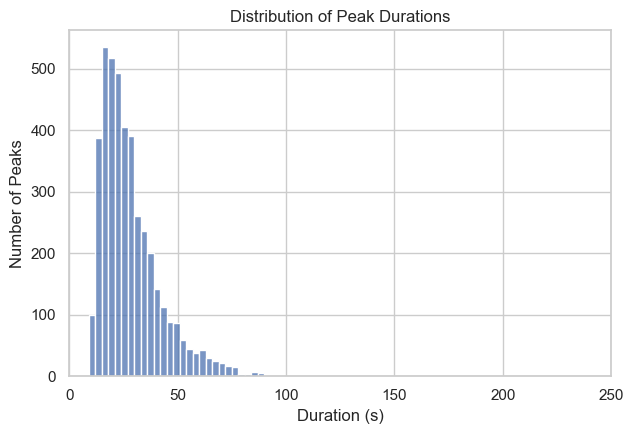

[2025-08-26 17:08:39] [INFO] calcium: plot_histogram: removed 113 outliers out of 4339 on 'Prominence (noise std units)' (lower=-8.25, upper=100.35)


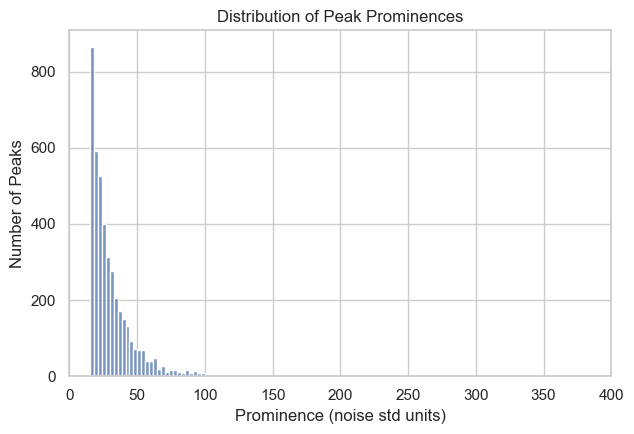

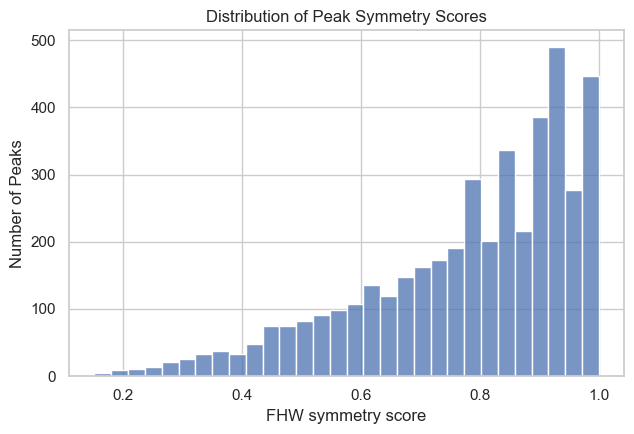

In [22]:
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Cell-cell communication speed

[2025-08-26 17:08:40] [INFO] calcium: plot_histogram: removed 9 outliers out of 1175 on 'Average communication speed (um/s)' (lower=-10.67, upper=18.59)


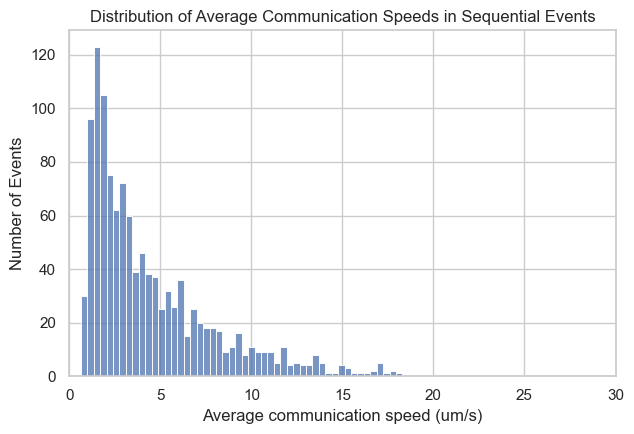

[2025-08-26 17:08:40] [INFO] calcium: plot_histogram: removed 11 outliers out of 3164 on 'Speed (um/s)' (lower=-10.49, upper=25.42)


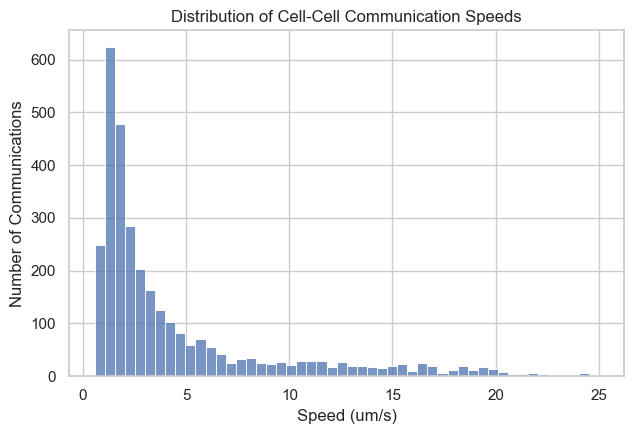

In [23]:
sequential_events = events[events["Event type"] == "SequentialEvent"].copy()
plot_histogram(
    df=sequential_events,
    column="Average communication speed (um/s)",
    title="Distribution of Average Communication Speeds in Sequential Events",
    ylabel="Number of Events",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

plot_histogram(
    df=communications,
    column="Speed (um/s)",
    title="Distribution of Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    return_outliers=False,
)

### Double distribution in cell-cell communication speeds

In [24]:
def seq_events_category(n: int) -> str:
    if n == 2:
        return "2"
    elif n == 3:
        return "3"
    elif n == 4:
        return "4"
    elif 5 <= n <= 10:
        return "5-10"
    else:
        return "11+"

sequential_events["Number of cells involved category"] = sequential_events["Number of cells involved"].apply(seq_events_category)

# Assign 'Number of cells involved category' to peaks based on their sequential event
peaks.loc[peaks["In event"] == "sequential", "Number of cells involved category"] = (
    peaks.loc[peaks["In event"] == "sequential", "Event ID"]
    .map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

# Assign 'Number of cells involved category' to communications based on their Event ID
communications["Number of cells involved category"] = (
    communications["Event ID"].map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

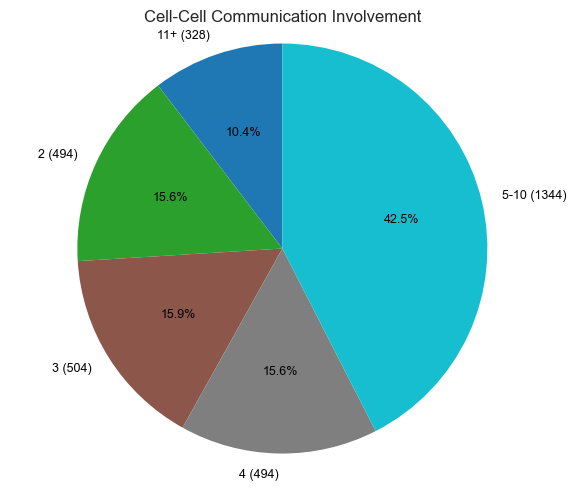

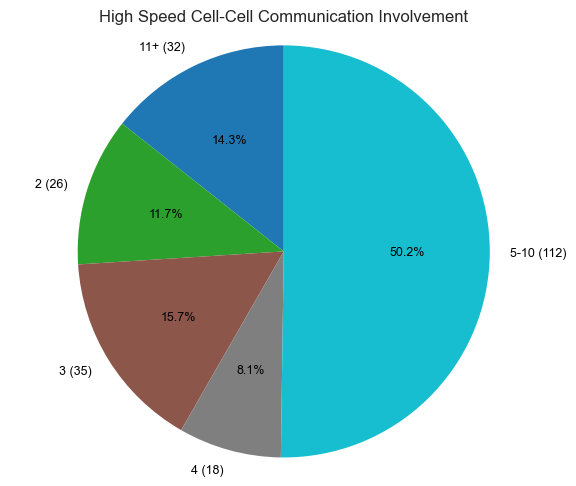

In [25]:
communications["Speed category"] = communications["Speed (um/s)"].apply(lambda x: "High speed" if x > 15 else "Low speed")
plot_pie_chart(
    df=communications,
    column="Number of cells involved category",
    title="Cell-Cell Communication Involvement"
)
plot_pie_chart(
    df=communications[communications["Speed category"] == "High speed"],
    column="Number of cells involved category",
    title="High Speed Cell-Cell Communication Involvement"
)

[2025-08-26 17:08:40] [INFO] calcium: plot_histogram: removed 1 outliers out of 223 on 'Speed (um/s)' (lower=5.545, upper=30.99)


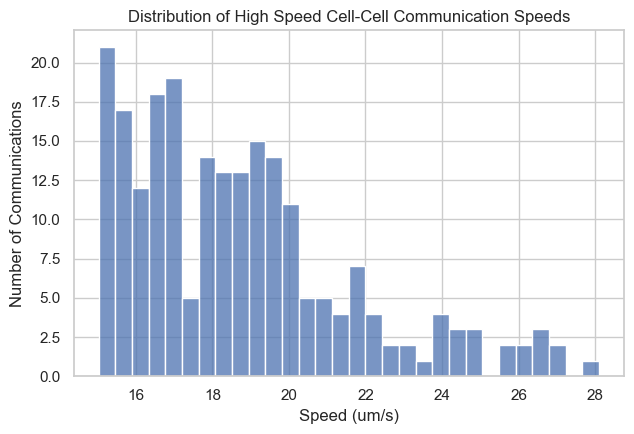

[2025-08-26 17:08:40] [INFO] calcium: plot_histogram_by_group: removed 1 outliers out of 223 on 'Speed (um/s)' (lower=5.545, upper=30.99)


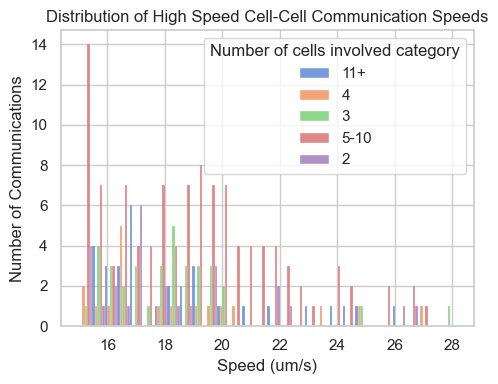

In [26]:
plot_histogram(
    df=communications[communications["Speed category"] == "High speed"],
    column="Speed (um/s)",
    title="Distribution of High Speed Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=30,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False
)
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=30,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    multiple="dodge"
)

[2025-08-26 17:08:41] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 197 on 'Event time phase (fraction of event duration)' (lower=-1.78, upper=2.56)


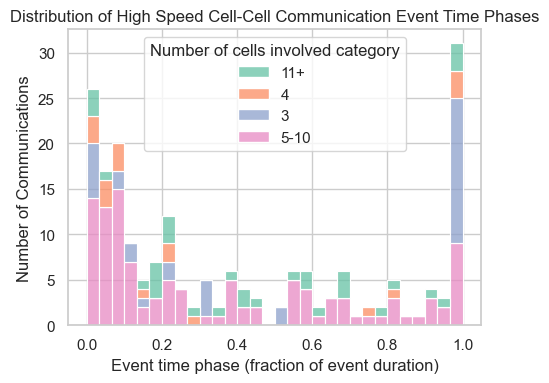

[2025-08-26 17:08:41] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 197 on 'Event recruitment phase (fraction of involved cells)' (lower=-1.2, upper=1.6)


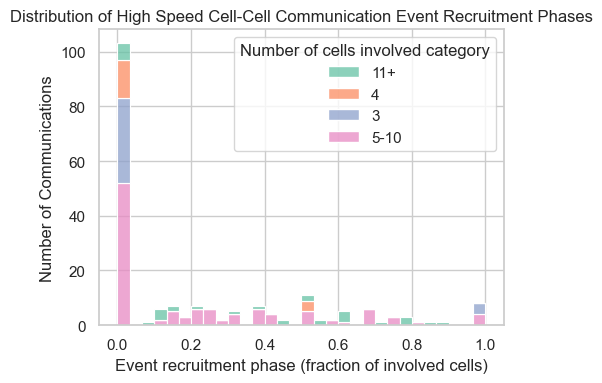

In [27]:
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Event time phase (fraction of event duration)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Event Time Phases",
    ylabel="Number of Communications",
    bin_count=30,
    palette="Set2",
    multiple="stack",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=None,
    y_axis_boundaries=None
)
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Event recruitment phase (fraction of involved cells)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Event Recruitment Phases",
    ylabel="Number of Communications",
    bin_count=30,
    palette="Set2",
    multiple="stack",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=None,
    y_axis_boundaries=None,
)

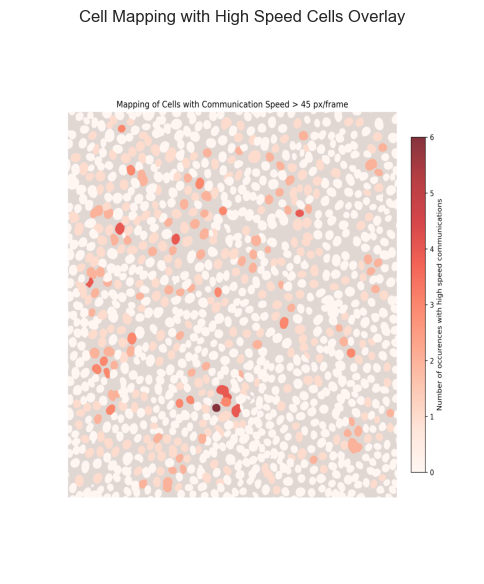

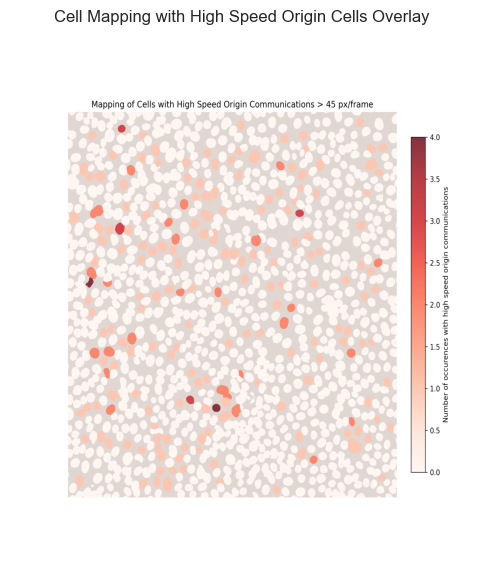

In [28]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/high_speed_cells_overlay.png",
    title="Cell Mapping with High Speed Cells Overlay",
    figsize=(5, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/high_speed_origin_cells_overlay.png",
    title="Cell Mapping with High Speed Origin Cells Overlay",
    figsize=(5, 6)
)

Communication ID  Event ID  Origin cell ID  Origin cell peak ID  \
2        2016994518608         6             642                    2   
15       2016994508912         8            1226                    3   
29       2016784339520        10             595                    4   
30       2016784614592        10             555                    4   
41       2018409056912        10             789                    2   
...                ...       ...             ...                  ...   
3056     2016916181184      1116            1608                    7   
3101     2016916190352      1136            1735                    4   
3116     2016916188624      1144            1693                    0   
3135     2016996240992      1156            1651                    7   
3136     2016996231680      1156            1717                    6   

      Cause cell ID  Cause cell peak ID  Start time (s)  End time (s)  \
2               662                   2           487.0         487.0   
15             1215                   8           554.0         554.0   
29              607                   5           684.0         684.0   
30              521                   4           685.0         686.0   
41              740                   8           653.0         654.0   
...             ...                 ...             ...           ...   
3056           1646                   4           846.0         847.0   
3101           1675                   3           611.0         612.0   
3116           1683                   0            30.0          31.0   
3135           1717                   6           735.0         736.0   
3136           1720                   7           736.0         737.0   

      Duration (s)  Distance (um)  Speed (um/s)  \
2              0.0          25.00         25.00   
15             0.0          16.34         16.34   
29             0.0          18.37         18.37   
30             1.0          18.79         18.79   
41             1.0          19.07         19.07   
...            ...            ...           ...   
3056           1.0          19.70         19.70   
3101           1.0          24.80         24.80   
3116           1.0          28.10         28.10   
3135           1.0          19.80         19.80   
3136           1.0          16.64         16.64   

      Event time phase (fraction of event duration)  \
2                                              0.17   
15                                             0.80   
29                                             0.79   
30                                             0.83   
41                                             0.17   
...                                             ...   
3056                                            NaN   
3101                                           0.03   
3116                                           1.00   
3135                                           0.14   
3136                                           0.29   

      Event recruitment phase (fraction of involved cells)       dataset  \
2                                                  0.11     20250326_IS1   
15                                                 0.00     20250326_IS1   
29                                                 0.52     20250326_IS1   
30                                                 0.86     20250326_IS1   
41                                                 0.10     20250326_IS1   
...                                                 ...              ...   
3056                                                NaN     20250326_IS1   
3101                                               0.00     20250326_IS1   
3116                                               1.00     20250326_IS1   
3135                                               0.00     20250326_IS1   
3136                                               0.50     20250326_IS1   

     Number of cells involved category Speed category  
2        

Speed category  High speed  Low speed
Origin cell ID                       
248                      0          2
251                      0          2
255                      0          2
258                      0          3
259                      0          1
...                    ...        ...
1738                     0          5
1741                     0          1
1742                     0          4
1744                     0          3
1745                     0          1

[923 rows x 2 columns]

Cell ID  Centroid X coordinate (um)  Centroid Y coordinate (um)  \
0         248                       17.23                        5.85   
1         251                       97.83                        5.53   
2         255                      362.70                        9.75   
4         258                      141.38                       10.08   
5         259                      189.15                       11.05   
...       ...                         ...                         ...   
1041     1738                       90.03                      491.40   
1044     1741                      253.50                      492.05   
1045     1742                      352.62                      491.73   
1046     1744                      369.53                      492.70   
1047     1745                      394.88                      492.38   

      Number of peaks  Is active  Occurrences in global events  \
0                  18       True                             4   
1                  12       True                             4   
2                  10       True                             4   
4                   8       True                             4   
5                   7       True                             4   
...               ...        ...                           ...   
1041               17       True                             4   
1044               12       True                             4   
1045               11       True                             2   
1046               10       True                             2   
1047                5       True                             2   

      Occurrences in global events as early peaker Early peaker event IDs  \
0                                                0                     []   
1                                                1                    [4]   
2                                                0                     []   
4                                                0                     []   
5                                                0                     []   
...                                            ...                    ...   
1041                                             0                     []   
1044                                             0                     []   
1045                                             0                     []   
1046                                             1                    [1]   
1047                                             0                     []   

      Occurrences in sequential events  \
0                                    5   
1                                    5   
2                                    2   
4                                    3   
5                                    2   
...                                ...   
1041                                 3   
1044                                 2   
1045                                 6   
1046                                 4   
1047                                 1   

      Occurrences in sequential events as origin  \
0                                              2   
1                                              1   
2                                              1   
4                                              1   
5                                              1   
...                                          ...   
1041                                           3   
1044                                           1   
1045                                           2   
1046                                           3   
1047                                           1   

      Occurrences in individual events  Peak frequency (Hz)  \
0                                    7               0.0110   
1                                    1               0.0071   
2                                    2               0.0059   
4                            

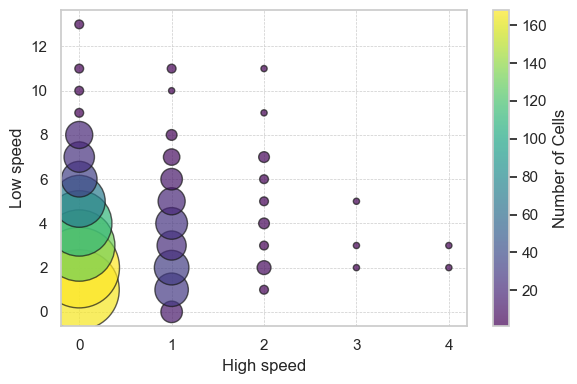

In [29]:
display(communications[communications["Speed category"] == "High speed"])

counts = (
    communications
    .groupby(["Origin cell ID", "Speed category"], dropna=False)
    .size()
    .unstack("Speed category", fill_value=0)
)
display(counts)
out = cells.copy()
out = out.merge(
    counts,
    left_on="Cell ID",
    right_index=True,
    how="left"
).dropna()
display(out)

plot_scatter_size_coded(
    df=out,
    x_col="High speed",
    y_col="Low speed"
)



### Number of cells involved per sequential events

[2025-08-26 17:08:43] [INFO] calcium: plot_histogram: removed 26 outliers out of 1175 on 'Number of cells involved' (lower=-4, upper=10)


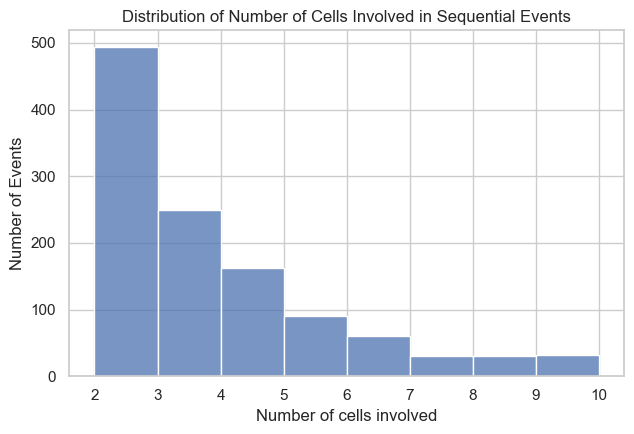

In [30]:
plot_histogram(
    df=sequential_events,
    column="Number of cells involved",
    title="Distribution of Number of Cells Involved in Sequential Events",
    ylabel="Number of Events",
    bin_width=1,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)

### Influence of cell count per event on statistics

[2025-08-26 17:08:43] [INFO] calcium: plot_histogram_by_group: removed 74 outliers out of 4339 on 'Duration (s)' (lower=-6, upper=90)


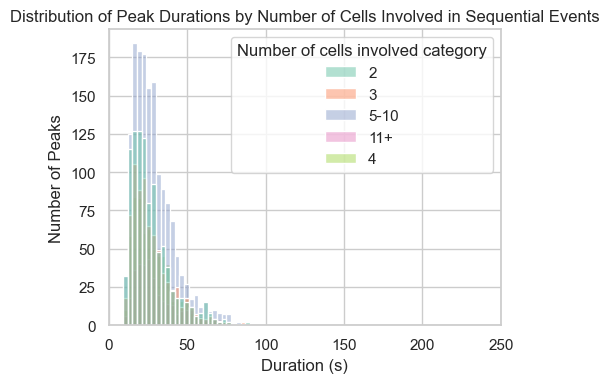

[2025-08-26 17:08:44] [INFO] calcium: plot_histogram_by_group: removed 113 outliers out of 4339 on 'Prominence (noise std units)' (lower=-8.25, upper=100.35)


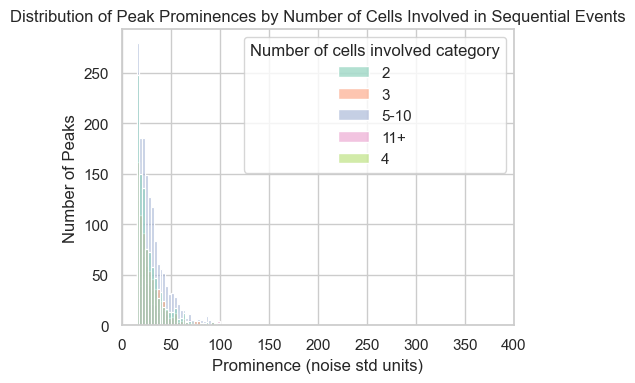

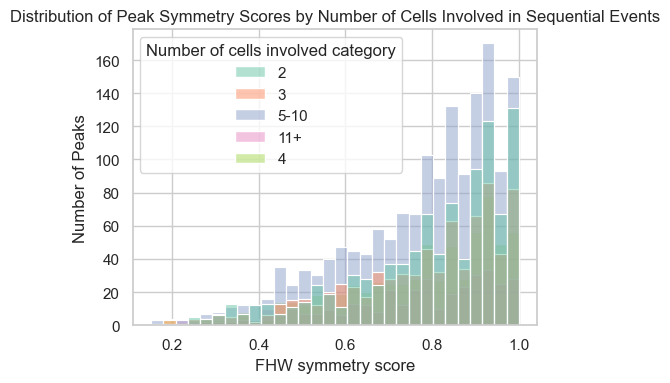

In [31]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Duration (s)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Durations by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Prominence (noise std units)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Prominences by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="FHW symmetry score",
    group_column="Number of cells involved category",
    title="Distribution of Peak Symmetry Scores by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

[2025-08-26 17:08:44] [INFO] calcium: plot_histogram_by_group: removed 9 outliers out of 1175 on 'Average communication speed (um/s)' (lower=-10.67, upper=18.59)


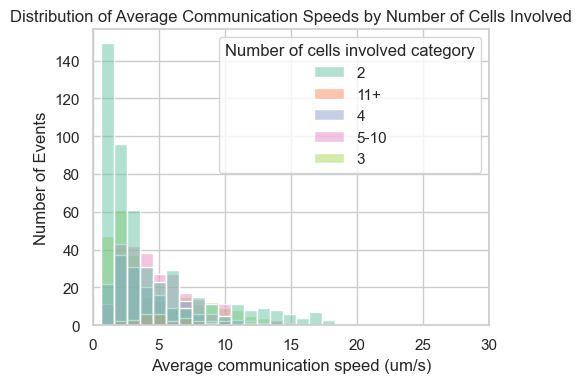

[2025-08-26 17:08:44] [INFO] calcium: plot_histogram_by_group: removed 132 outliers out of 3164 on 'Speed (um/s)' (lower=-10.49, upper=17.44)


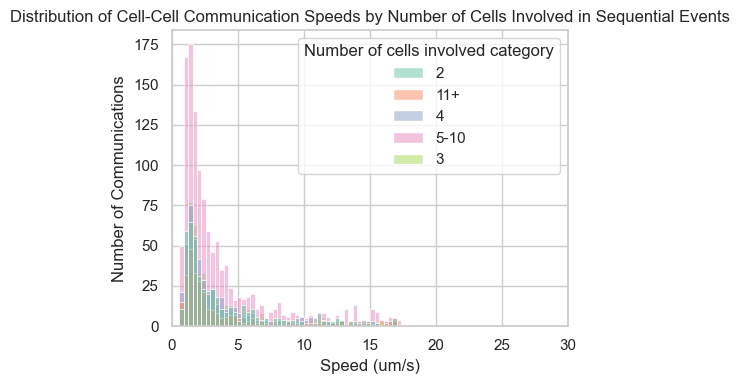

In [32]:
plot_histogram_by_group(
    df=sequential_events,
    value_column="Average communication speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Average Communication Speeds by Number of Cells Involved",
    ylabel="Number of Events",
    bin_width=1,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

plot_histogram_by_group(
    df=communications,
    value_column="Speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Cell-Cell Communication Speeds by Number of Cells Involved in Sequential Events",
    ylabel="Number of Communications",
    bin_count=50,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

### Cells Occurrences as origin in sequential events

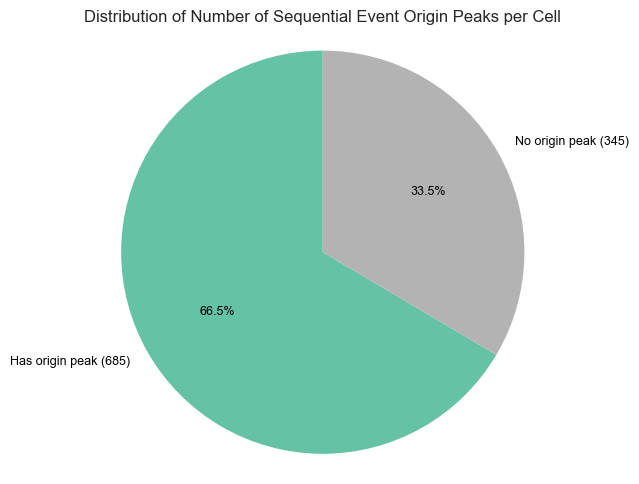

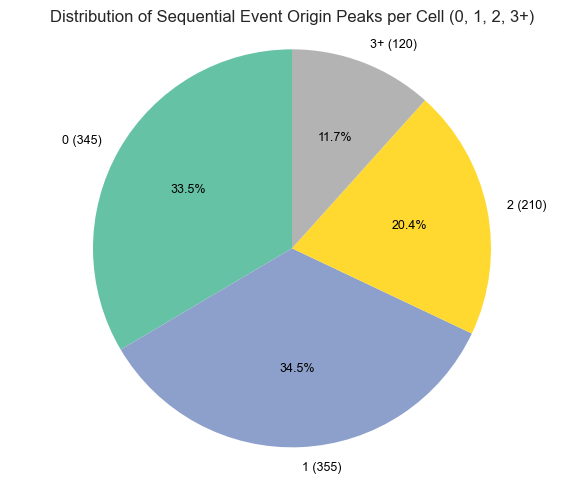

In [33]:
cells["Has origin peak"] = cells["Occurrences in sequential events as origin"].apply(lambda x: "Has origin peak" if x > 0 else "No origin peak")
plot_pie_chart(
    df=cells[cells["Occurrences in sequential events"] > 0],
    column="Has origin peak",
    title="Distribution of Number of Sequential Event Origin Peaks per Cell",
    palette="Set2"
)
def origin_peak_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    else:
        return "3+"

cells["Origin peak category"] = cells["Occurrences in sequential events as origin"].apply(origin_peak_category)

plot_pie_chart(
    df=cells[cells["Occurrences in sequential events"] > 0],
    column="Origin peak category",
    title="Distribution of Sequential Event Origin Peaks per Cell (0, 1, 2, 3+)",
    palette="Set2"
)


In [34]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_Occurrences_in_origin_seq_events_overlay.png",
    title="Cell Mapping with Origin Peaks Overlay",
    figsize=(5, 6)
)

[2025-08-26 17:08:45] [ERROR] calcium: Failed to read image 'D:\Mateo\20250701\Output\IS2\cell-mapping\cell_Occurrences_in_origin_seq_events_overlay.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250701\\Output\\IS2\\cell-mapping\\cell_Occurrences_in_origin_seq_events_overlay.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = 

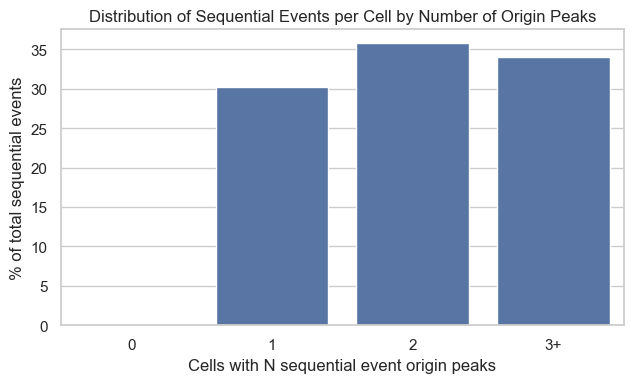

In [35]:
# Sum the total number of sequential origin peaks for each exact value (0, 1, 2, 3, ...)
total_peaks_per_exact_value = (
    cells.groupby("Origin peak category")
    ["Occurrences in sequential events as origin"]
    .sum()
    .reset_index(name="Total origin peaks")
)

# Compute normalized percentage
total_sum = total_peaks_per_exact_value["Total origin peaks"].sum()
total_peaks_per_exact_value["% of total"] = (
    total_peaks_per_exact_value["Total origin peaks"] / total_sum * 100
).round(2)

plot_bar(
    df=total_peaks_per_exact_value,
    axis_column="Origin peak category",
    value_column="% of total",
    title="Distribution of Sequential Events per Cell by Number of Origin Peaks",
    ylabel="% of total sequential events",
    xlabel="Cells with N sequential event origin peaks",
    rotation=0
)

### Connection network between cells

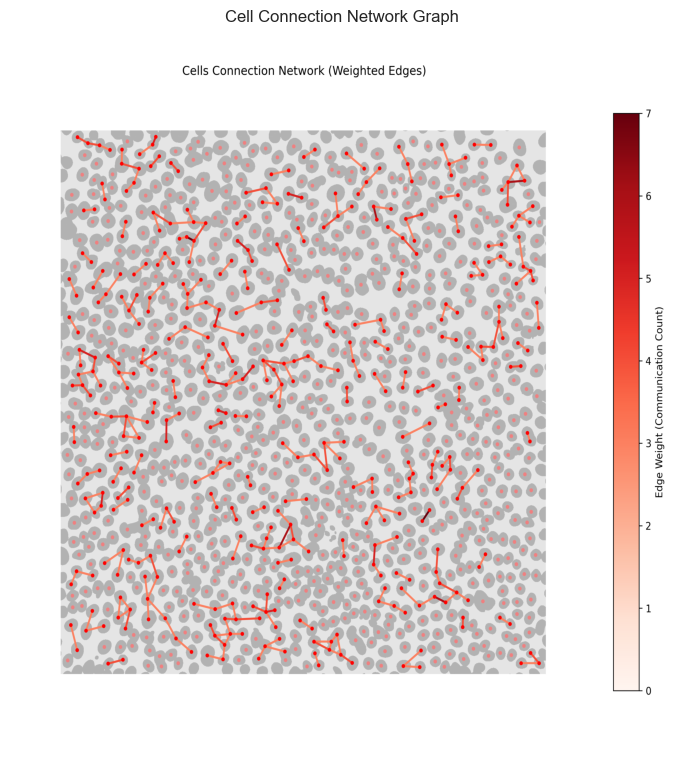

In [36]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_connection_network/cell_connection_network_95.png",
    title="Cell Connection Network Graph",
    figsize=(7, 8)
)

### Pair/Trios with high communication networks

[2025-08-26 17:08:46] [INFO] calcium: build_neighbor_pair_stats: built 3009 pairs across 1 datasets (mean distance=16.79 um)


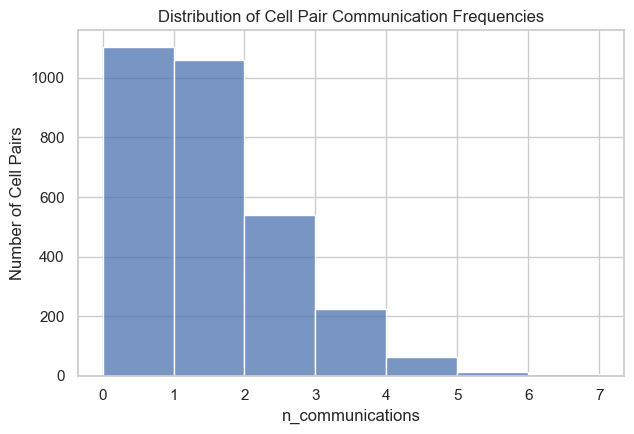

95th percentile threshold: 3.0


In [37]:
pairs_communication_df = build_neighbor_pair_stats(
    cells_df=cells,
    comm_df=communications,
    dataset_col="dataset",
    cell_id_col="Cell ID",
    centroid_x_col="Centroid X coordinate (um)",
    centroid_y_col="Centroid Y coordinate (um)",
    neighbors_col="Neighbors (labels)",
    edge_cols=("Cell ID", "Neighbor ID")
    )

plot_histogram(
    df=pairs_communication_df,
    column="n_communications",
    title="Distribution of Cell Pair Communication Frequencies",
    ylabel="Number of Cell Pairs",
    bin_width=1,
    filter_outliers=False,
    outliers_bounds=(3,3),
)

percentile_thresh = pairs_communication_df["n_communications"].quantile(0.95)
print(f"95th percentile threshold: {percentile_thresh}")

top_pair_communication_df = pairs_communication_df[pairs_communication_df["n_communications"] >= percentile_thresh].copy()

origin_com = communications["Origin cell ID"]
cause_com = communications["Cause cell ID"]
communications["pair_key"] = list(
    zip(origin_com.where(origin_com <= cause_com, cause_com),
        cause_com.where(cause_com >= origin_com, origin_com))
)

top_pair_keys = set(zip(top_pair_communication_df["Cell A"], top_pair_communication_df["Cell B"]))
communications["from_high_comm_pair"] = communications["pair_key"].isin(top_pair_keys)

peaks_in_top_comms = pd.concat([
    communications.loc[communications["from_high_comm_pair"], ["Origin cell ID", "Origin cell peak ID"]]
        .rename(columns={"Origin cell ID": "Cell ID", "Origin cell peak ID": "Peak ID"}),
    communications.loc[communications["from_high_comm_pair"], ["Cause cell ID", "Cause cell peak ID"]]
        .rename(columns={"Cause cell ID": "Cell ID", "Cause cell peak ID": "Peak ID"})
], ignore_index=True).drop_duplicates()


peaks["from_high_comm_pair"] = peaks.set_index(["Cell ID", "Peak ID"]).index.isin(peaks_in_top_comms.set_index(["Cell ID", "Peak ID"]).index)

In [38]:
cells_in_pairs = pd.Series(
    [cell for pair in top_pair_keys for cell in pair]
)

highly_connected_cells = (
    cells_in_pairs.value_counts()
    .reset_index()
    .rename(columns={"index": "Cell ID", "count": "Number of highly connected pairs"})
)

comms_high = communications.loc[communications["from_high_comm_pair"], ["Origin cell ID", "Cause cell ID"]].copy()

# Counts as origin and as cause
origin_counts = comms_high["Origin cell ID"].value_counts().rename("n_origin")
cause_counts = comms_high["Cause cell ID"].value_counts().rename("n_cause")

per_cell_comm = (
    pd.concat([origin_counts, cause_counts], axis=1)
    .fillna(0)
    .astype(int)
)

# Total comms involved = as origin + as cause
per_cell_comm["n_communications"] = per_cell_comm["n_origin"] + per_cell_comm["n_cause"]

# Ratio = origin / total (safe divide)
per_cell_comm["origin_ratio"] = per_cell_comm["n_origin"] / per_cell_comm["n_communications"].replace({0: pd.NA})

# Make Cell ID a column for merging
per_cell_comm = per_cell_comm.reset_index().rename(columns={"index": "Cell ID"})

# 3) Merge into your highly_connected_cells table
highly_connected_cells = highly_connected_cells.merge(
    per_cell_comm[["Cell ID", "n_communications", "n_origin", "origin_ratio"]],
    on="Cell ID",
    how="left"
)

# Fill cells that appear in top pairs but have no comm rows (should be rare)
highly_connected_cells[["n_communications", "n_origin"]] = highly_connected_cells[["n_communications", "n_origin"]].fillna(0).astype(int)
highly_connected_cells["origin_ratio"] = highly_connected_cells["origin_ratio"].fillna(0.0)

# (Optional) nicer column names
highly_connected_cells = highly_connected_cells.rename(columns={
    "n_communications": "Number of communications (top pairs)",
    "n_origin": "Number of times origin (top pairs)",
    "origin_ratio": "Origin ratio (origin/communications)"
})

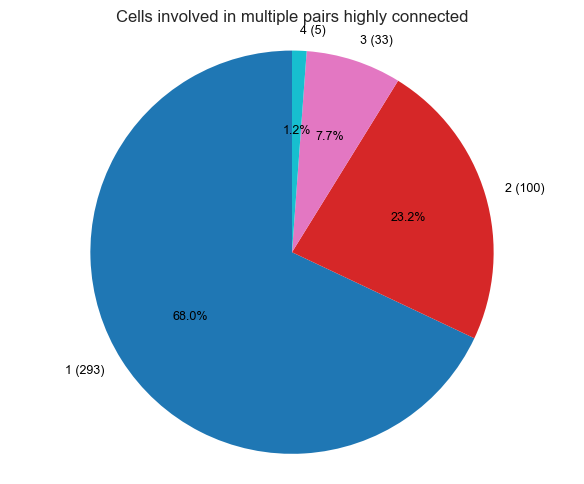

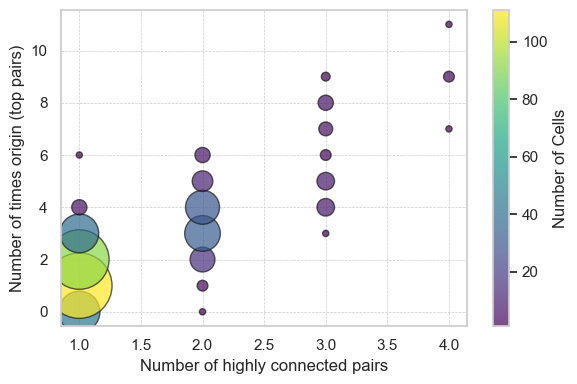

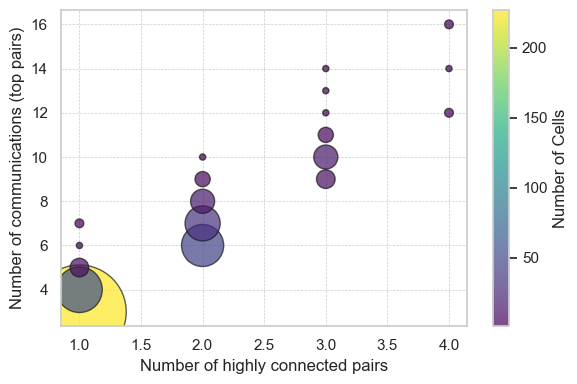

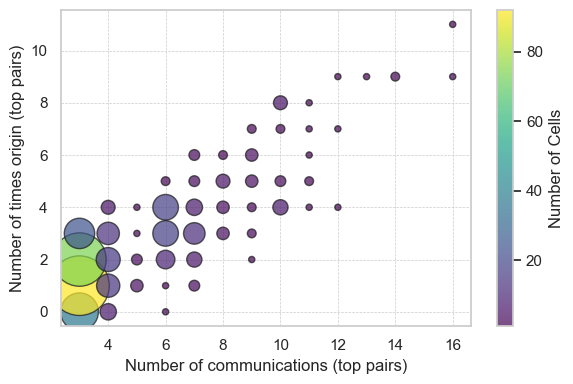

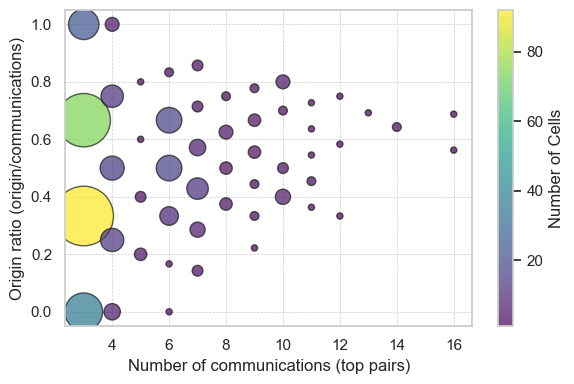

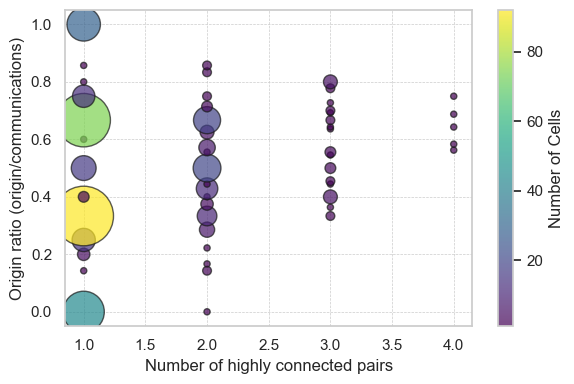

In [39]:
plot_pie_chart(
    df=highly_connected_cells,
    column="Number of highly connected pairs",
    title="Cells involved in multiple pairs highly connected"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of highly connected pairs",
    y_col="Number of times origin (top pairs)"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of highly connected pairs",
    y_col="Number of communications (top pairs)"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of communications (top pairs)",
    y_col="Number of times origin (top pairs)"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of communications (top pairs)",
    y_col="Origin ratio (origin/communications)"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of highly connected pairs",
    y_col="Origin ratio (origin/communications)"
)

[2025-08-26 17:08:47] [INFO] calcium: plot_points_mean_std: N=293 for Number of highly connected pairs=1
[2025-08-26 17:08:47] [INFO] calcium: plot_points_mean_std: N=100 for Number of highly connected pairs=2
[2025-08-26 17:08:47] [INFO] calcium: plot_points_mean_std: N=33 for Number of highly connected pairs=3
[2025-08-26 17:08:47] [INFO] calcium: plot_points_mean_std: N=5 for Number of highly connected pairs=4


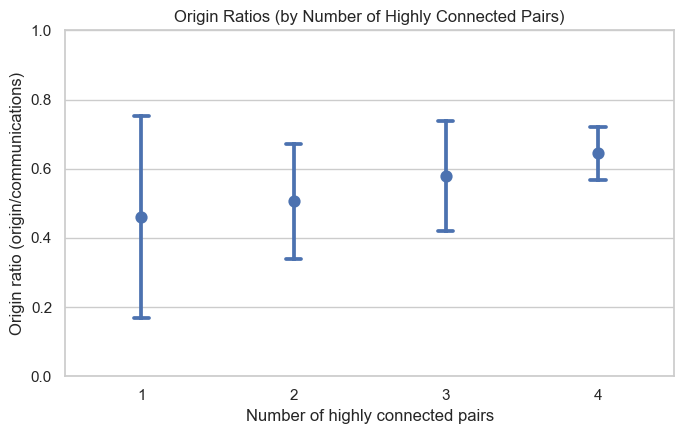

In [40]:
plot_points_mean_std(
    df=highly_connected_cells,
    x="Number of highly connected pairs",
    y="Origin ratio (origin/communications)",
    title="Origin Ratios (by Number of Highly Connected Pairs)",
    show_points=False,
    y_axis_boundaries=(0, 1)
)

[2025-08-26 17:08:47] [INFO] calcium: plot_histogram: removed 25 outliers out of 1775 on 'Duration (s)' (lower=-27, upper=78)


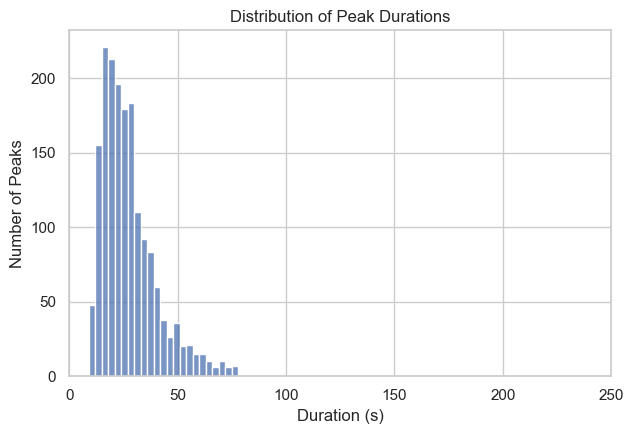

[2025-08-26 17:08:47] [INFO] calcium: plot_histogram: removed 60 outliers out of 1775 on 'Prominence (noise std units)' (lower=-36.85, upper=94.4)


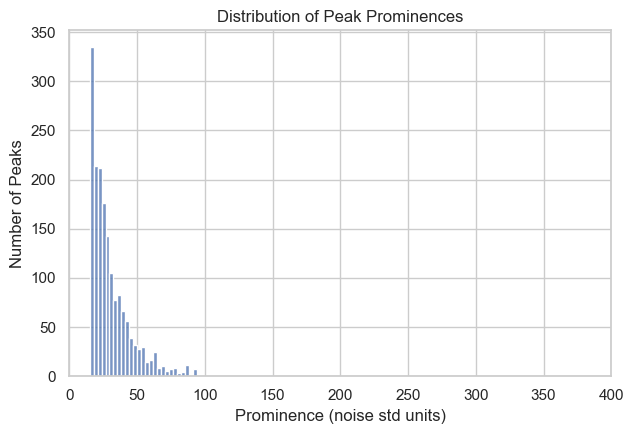

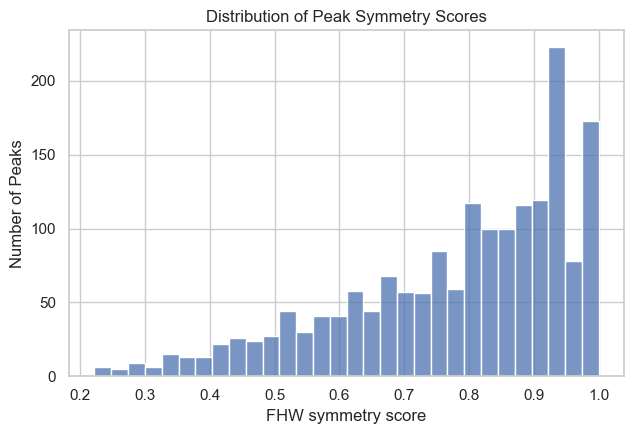

[2025-08-26 17:08:47] [INFO] calcium: plot_histogram: removed 25 outliers out of 1026 on 'Speed (um/s)' (lower=-10.935, upper=18.08)


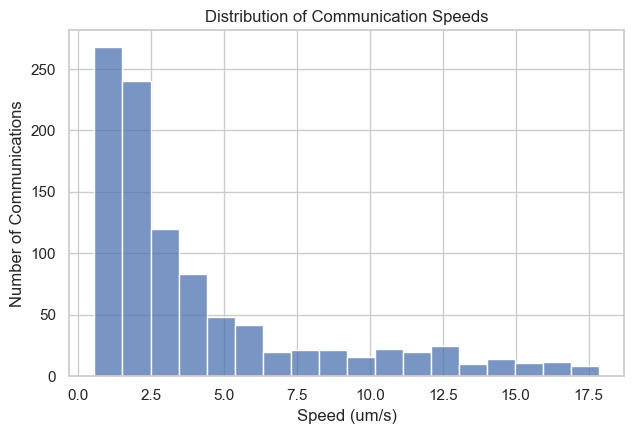

In [41]:
plot_histogram(
    df=peaks[(peaks["In event"] == "sequential") & (peaks["from_high_comm_pair"])],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[(peaks["In event"] == "sequential") & (peaks["from_high_comm_pair"])],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[(peaks["In event"] == "sequential") & (peaks["from_high_comm_pair"])],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)
plot_histogram(
    df=communications[communications["from_high_comm_pair"]],
    column="Speed (um/s)",
    title="Distribution of Communication Speeds",
    ylabel="Number of Communications",
    bin_width=1,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False
)

[2025-08-26 17:08:47] [INFO] calcium: plot_histogram_by_group: removed 85 outliers out of 4339 on 'Duration (s)' (lower=-30, upper=82)


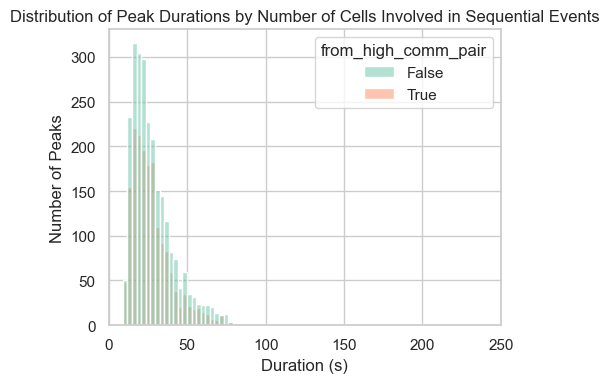

[2025-08-26 17:08:48] [INFO] calcium: plot_histogram_by_group: removed 143 outliers out of 4339 on 'Prominence (noise std units)' (lower=-35.4, upper=91.3)


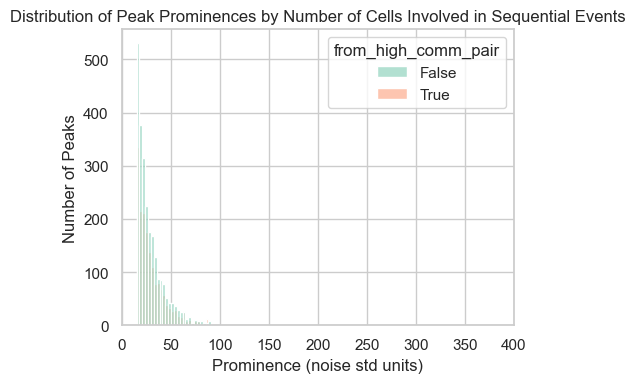

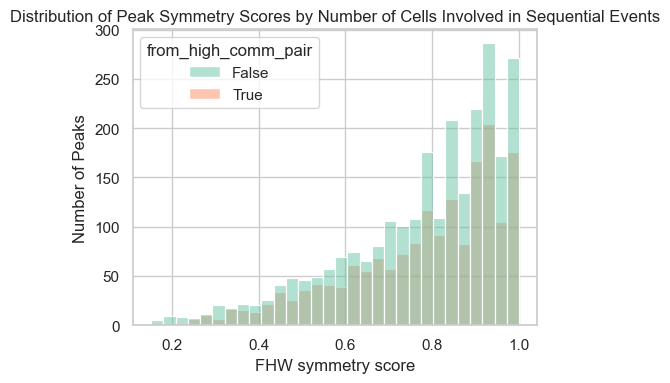

[2025-08-26 17:08:48] [INFO] calcium: plot_histogram_by_group: removed 132 outliers out of 3164 on 'Speed (um/s)' (lower=-10.49, upper=17.44)


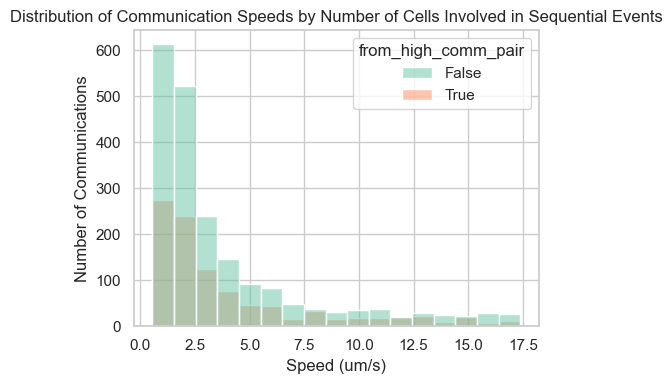

In [42]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Duration (s)",
    group_column="from_high_comm_pair",
    title="Distribution of Peak Durations by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Prominence (noise std units)",
    group_column="from_high_comm_pair",
    title="Distribution of Peak Prominences by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="FHW symmetry score",
    group_column="from_high_comm_pair",
    title="Distribution of Peak Symmetry Scores by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=communications,
    value_column="Speed (um/s)",
    group_column="from_high_comm_pair",
    title="Distribution of Communication Speeds by Number of Cells Involved in Sequential Events",
    ylabel="Number of Communications",
    bin_width=1,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False
)

## INDIVIDUAL EVENTS

### Cells Occurrences in individual events

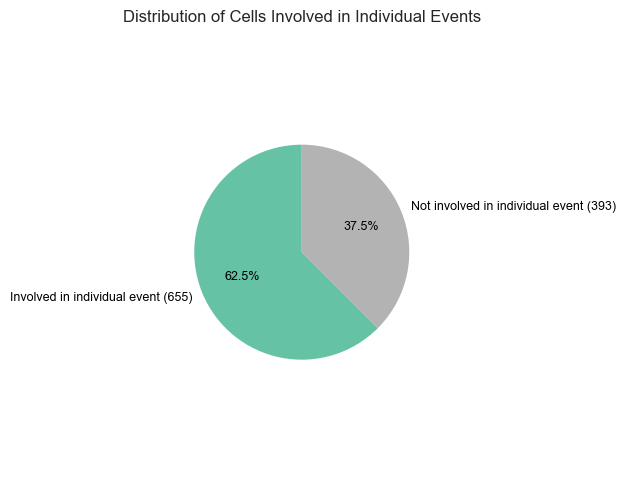

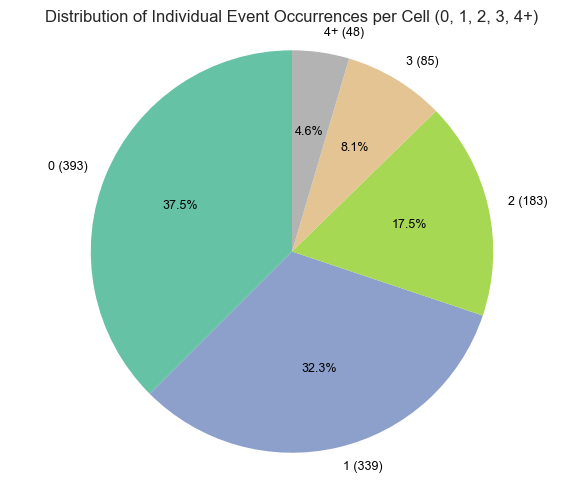

In [43]:
cells["Involved in individual event"] = cells["Occurrences in individual events"].apply(lambda x: "Involved in individual event" if x > 0 else "Not involved in individual event")

plot_pie_chart(
    df=cells,
    column="Involved in individual event",
    title="Distribution of Cells Involved in Individual Events",
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    elif n == 3:
        return "3"
    else:
        return "4+"

cells["Occurrences in individual events category"] = cells["Occurrences in individual events"].apply(cells_category)

plot_pie_chart(
    df=cells,
    column="Occurrences in individual events category",
    title="Distribution of Individual Event Occurrences per Cell (0, 1, 2, 3, 4+)",
    palette="Set2"
)

In [44]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurrences_in_individual_events_overlay.png",
    title="Cell Mapping with Occurrences in Individual Events Overlay",
    figsize=(5, 6)
)

[2025-08-26 17:08:48] [ERROR] calcium: Failed to read image 'D:\Mateo\20250701\Output\IS2\cell-mapping\cell_occurrences_in_individual_events_overlay.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250701\\Output\\IS2\\cell-mapping\\cell_occurrences_in_individual_events_overlay.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = 

### Peaks statistics in individual events

[2025-08-26 17:08:48] [INFO] calcium: plot_histogram: removed 27 outliers out of 1188 on 'Duration (s)' (lower=-29, upper=76)


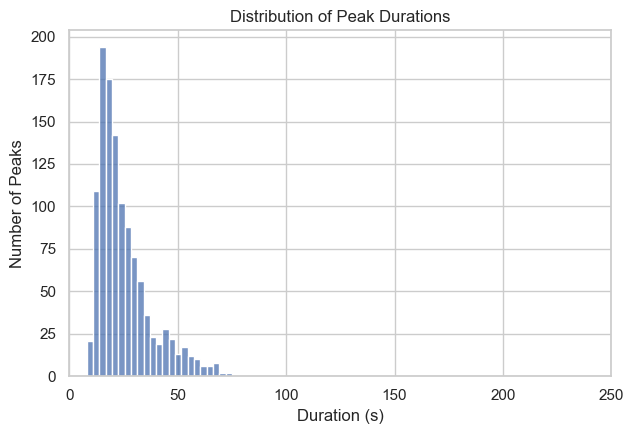

[2025-08-26 17:08:49] [INFO] calcium: plot_histogram: removed 22 outliers out of 1188 on 'Prominence (noise std units)' (lower=-15.9, upper=62.5)


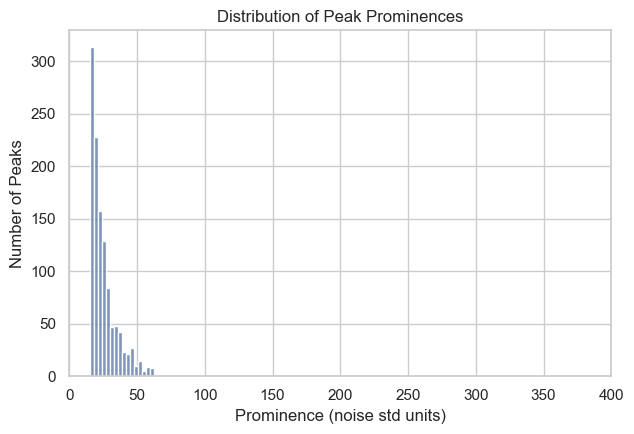

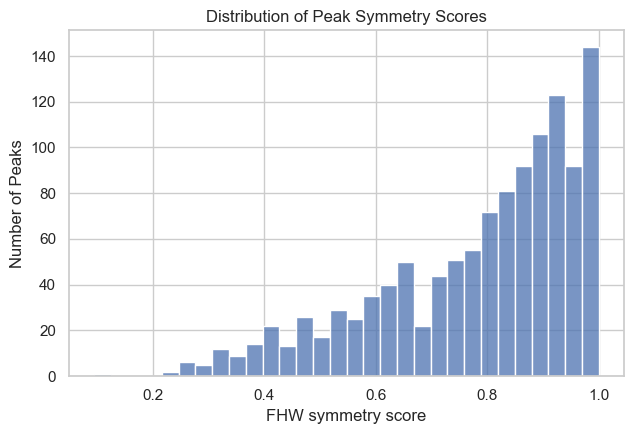

In [45]:
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Correlation between event activity level & individual activity level

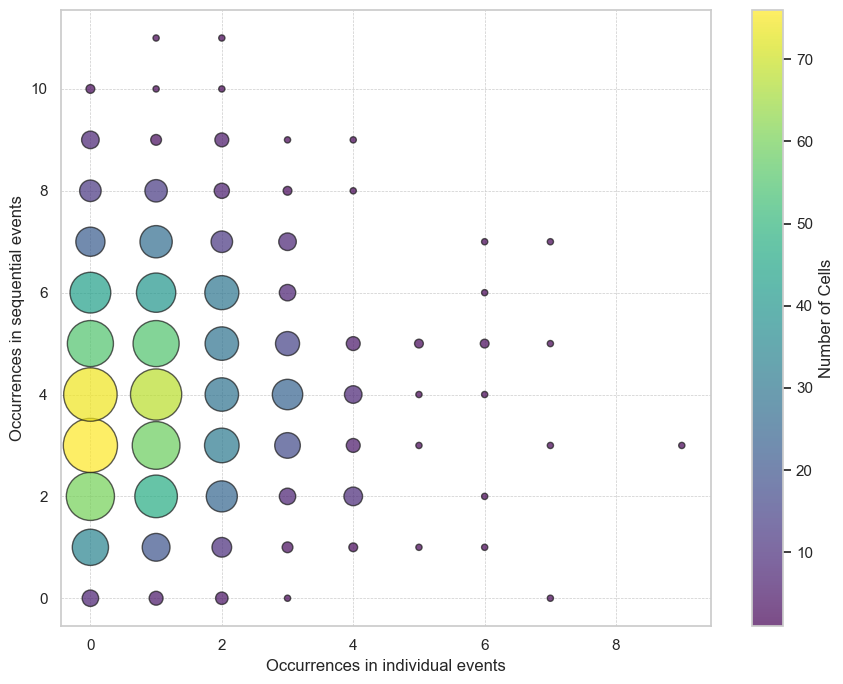

[2025-08-26 17:08:49] [INFO] calcium: plot_points_mean_std: removed 0/1048 outliers on 'Occurrences in sequential events' (lower=-3, upper=11)
[2025-08-26 17:08:49] [INFO] calcium: plot_points_mean_std: N=393 for Occurrences in individual events=0
[2025-08-26 17:08:49] [INFO] calcium: plot_points_mean_std: N=339 for Occurrences in individual events=1
[2025-08-26 17:08:49] [INFO] calcium: plot_points_mean_std: N=183 for Occurrences in individual events=2
[2025-08-26 17:08:49] [INFO] calcium: plot_points_mean_std: N=85 for Occurrences in individual events=3
[2025-08-26 17:08:49] [INFO] calcium: plot_points_mean_std: N=31 for Occurrences in individual events=4
[2025-08-26 17:08:49] [INFO] calcium: plot_points_mean_std: N=5 for Occurrences in individual events=5
[2025-08-26 17:08:49] [INFO] calcium: plot_points_mean_std: N=7 for Occurrences in individual events=6
[2025-08-26 17:08:49] [INFO] calcium: plot_points_mean_std: N=4 for Occurrences in individual events=7
[2025-08-26 17:08:49] [IN

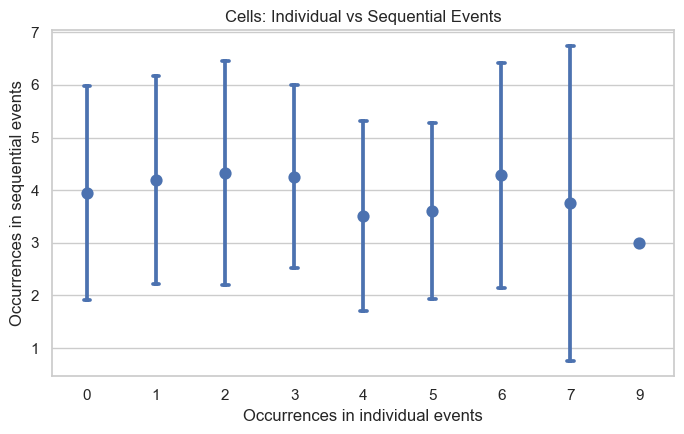

In [46]:
plot_scatter_size_coded(
    df=cells,
    x_col="Occurrences in individual events",
    y_col="Occurrences in sequential events",
    size_scale=20,
    figsize=(9, 7)
)

plot_points_mean_std(
    df=cells,
    x="Occurrences in individual events",
    y="Occurrences in sequential events",
    title="Cells: Individual vs Sequential Events",
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)

## CELLS MOTION

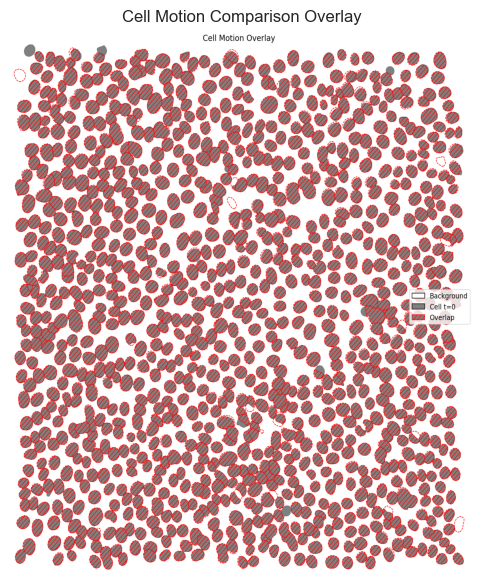

Number of cells:
- Hoechst image taken at t=0: 1048
- Hoechst image taken at t=1801: 1052
- Number of cells difference: absolute 4, relative 0.38%
Pixel-level cell segmentation:
- Total number of pixels in image: 4194304
- Pixels segmented as cell at t=0: 1151067
- Pixels segmented as cell at t=1801: 1152501
- Overlapping pixels between t=0 and t=1801: 1090633(94.69% of total)
- Pixels exclusive to t=0: 60434 (5.25% of total)
- Pixels exclusive to t=1801: 61868 (5.37% of total)


In [47]:
visualize_image(
    image_source=control_paths,
    image_name="cell-motion/cellmotion_comparison_overlay.png",
    title="Cell Motion Comparison Overlay",
    figsize=(5, 6)
)

cm = cellmotion.set_index("Metric")["Value"]
print("Number of cells:")
print(f"- Hoechst image taken at t=0: {int(cm['n_cells_t0'])}")
print(f"- Hoechst image taken at t=1801: {int(cm['n_cells_t1'])}")
print(
    f"- Number of cells difference: absolute {int(cm['cell_count_diff_abs'])}, "
    f"relative {cm['cell_count_diff_rel'] * 100:.2f}%"
)
print("Pixel-level cell segmentation:")
print(f"- Total number of pixels in image: {int(cm['total_pixels'])}")
print(f"- Pixels segmented as cell at t=0: {int(cm['pixels_t0'])}")
print(f"- Pixels segmented as cell at t=1801: {int(cm['pixels_t1'])}")
print(f"- Overlapping pixels between t=0 and t=1801: {int(cm['pixels_both'])}"
      f"({cm['pixels_both_rel'] * 100:.2f}% of total)")
print(f"- Pixels exclusive to t=0: {int(cm['pixels_only_t0'])} "
      f"({cm['pixels_only_t0_rel'] * 100:.2f}% of total)")
print(f"- Pixels exclusive to t=1801: {int(cm['pixels_only_t1'])} "
      f"({cm['pixels_only_t1_rel'] * 100:.2f}% of total)")
